In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
from nuprobe.inputs import NuSystem, create_U_PMNS, create_alpha
from nuprobe.probability import nuprobe
from nuprobe.params import theta12n, theta23n, theta13n, delta13n, m1n, m2n, m3n
from nuprobe.params import theta12i, theta23i, theta13i, delta13i, m1i, m2i, m3i

In [4]:
nu_sys = NuSystem(3)
nu_sys.set_theta(1, 2, 0.5836)
nu_sys.set_theta(2, 3, 0.8587)
nu_sys.set_theta(1, 3, 0.1496)
nu_sys.set_delta(1, 3, 2.9496)
UPMNS2 = create_U_PMNS(nu_sys.theta, nu_sys.delta)    
    
nu_sys.set_standard_normal()
UPMNS1 = create_U_PMNS(nu_sys.theta, nu_sys.delta)
    
PE = []
PE1 = []
num = 1000
EE = np.logspace(0, 2, num)
L = 1300

for i in range(num):
    PE.append(nuprobe(2, 1, L, EE[i], nu_sys.mass, UPMNS1, antinu=False, const_matter=True, V_NSI=None))
    PE1.append(nuprobe(2, 1, L, EE[i], nu_sys.mass, UPMNS2, antinu=False, const_matter=True, V_NSI=None)) 

PE1

[0.009694730642155687,
 0.008844873017040192,
 0.00803546333109077,
 0.007266899761475153,
 0.006539515104560039,
 0.005853578410000934,
 0.005209296662383525,
 0.004606816504756108,
 0.004046225998602663,
 0.0035275564150160743,
 0.0030507840520390015,
 0.0026158320733541884,
 0.0022225723637127356,
 0.0018708273966998087,
 0.0015603721106451718,
 0.0012909357886899898,
 0.0010622039392255373,
 0.0008738201731198895,
 0.0007253880743455048,
 0.00061647306081399,
 0.0005466042324151145,
 0.0005152762034421252,
 0.0005219509167673608,
 0.0005660594373094583,
 0.0006470037225053455,
 0.0007641583676684718,
 0.0009168723242769971,
 0.0011044705893936667,
 0.0013262558645717216,
 0.0015815101827480937,
 0.0018694965017685475,
 0.002189460263324954,
 0.002540630916217932,
 0.0029222234029840084,
 0.0033334396090477143,
 0.003773469773675404,
 0.004241493862119055,
 0.0047366828984428755,
 0.005258200258627761,
 0.005805202923644595,
 0.006376842692277626,
 0.006972267353565146,
 0.007590621

In [11]:
diff = [bound - mean for mean, bound in zip(PE, PE1)]
error = [d / mean for d, mean in zip(diff, PE)]
EE_error = [(E, e) for E, e in zip(EE, error)]
min(error)

-0.7730217031789356

In [8]:
diff = [bound - mean for mean, bound in zip(PE1, PE)]
error = [d / mean for d, mean in zip(diff, PE1)]
EE_error = [(E, e) for E, e in zip(EE, error)]
max(error)

3.4057075676637845

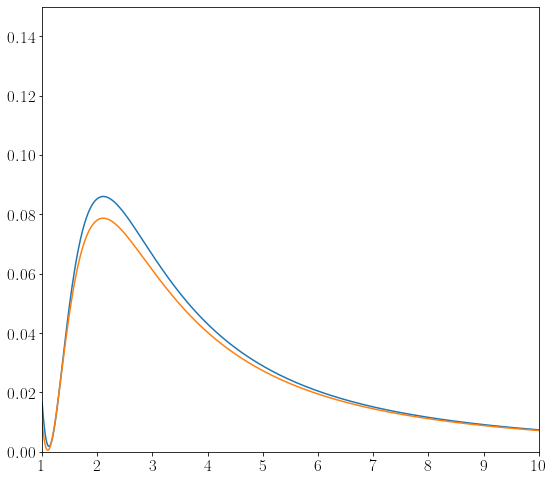

In [9]:
plt.rc('text', usetex=True)
plt.rcParams['text.latex.preamble']=r"\usepackage{amsmath,slashed}"
plt.rcParams.update({'figure.autolayout': True})
plt.rcParams["figure.figsize"] = (8, 7)
plt.rc('font', **{'family' : 'serif', 'size' : 17})

plt.xlim([min(EE), 10])
plt.ylim([0,0.15])
plt.plot(EE, PE)
plt.plot(EE, PE1)